In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
xl = pd.ExcelFile("C:/Users/user/Documents/Python_Scripts/growth_rate/ALL_DATA_for_matlab.xlsx")
df = xl.parse("plot_data")
df = df.replace('Flag','Aflag')
df.head()

,Project,Station,Latitude,Longitude,Cell type1,Practical kin cons,kin/SA model,Practical kin model,kin/SA,Temp,Fe/cell,dFe
0,EPZT,1,-12.0057,-79.1952,Aflag,7.817144e-08,5.394607e-10,2.579657e-07,1.780220e-09,17.61,2.866286e-17,0.11
1,EPZT,1,-12.0057,-79.1952,Aflag,7.903470e-08,8.291729e-10,2.608145e-07,2.736271e-09,17.61,2.897939e-17,0.11
2,EPZT,1,-12.0057,-79.1952,Aflag,1.493964e-08,1.663619e-10,4.930080e-08,5.489944e-10,17.61,5.477867e-18,0.11
3,EPZT,1,-12.0057,-79.1952,Aflag,3.463552e-07,9.036127e-10,1.142972e-06,2.981922e-09,17.61,1.269969e-16,0.11
4,EPZT,1,-12.0057,-79.1952,Aflag,1.668374e-08,1.704543e-10,5.505633e-08,5.624990e-10,17.61,6.117370e-18,0.11


In [11]:
proj = df['Project'].unique()
cell_type = df['Cell type1'].unique()
cell_type[:5]

array(['Aflag', 'Diatom', 'Ciliate', 'Cocco', 'Apico'], dtype=object)

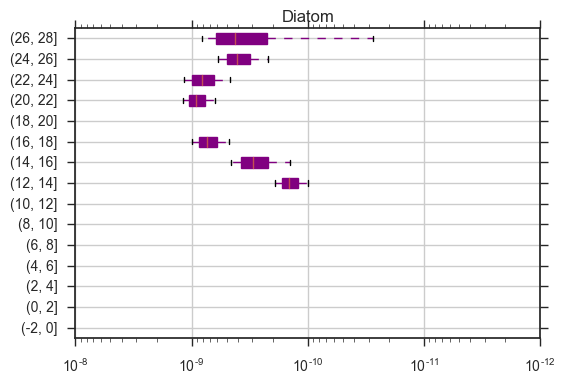

In [4]:
sns.set_style("ticks")
# select each of the project and plot them in figure ---> check
# group 'Temp' by ranges

sub = df[(df['Project']==proj[0]) & (df['Cell type1']=='Diatom')]
c = "purple"
bp = sub['kin/SA model'].groupby(pd.cut(sub["Temp"], np.arange(-2, 30, 2))
                            ).agg([np.nanmean,np.nanstd]).transpose().boxplot(vert=False, patch_artist=True,
                                                                             )
plt.setp(bp["boxes"], facecolor=c, color=c)
plt.setp(bp["whiskers"], color=c)

plt.xscale('log')
plt.xlim([10e-13,10e-9])
plt.title('Diatom')
plt.show()

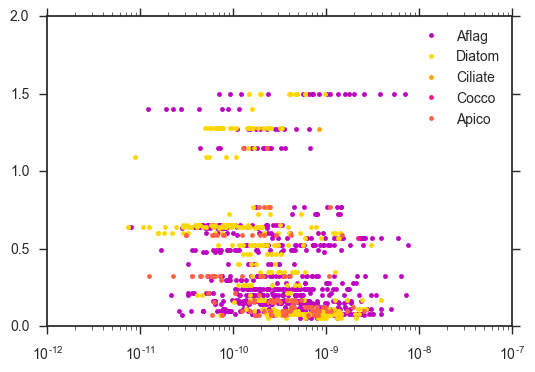

In [43]:
#show all the cells in different group or projs without groupby
c = ["m","gold","orange","deeppink","tomato"]
#marker = ['o', '.', '*', 'x', '+', 'v', '^', '<', '>', 's', 'd']
m = '.'

for ci, ti in zip(c, cell_type[:5]):
    sub = df[df['Cell type1']==ti]
    plt.plot(sub['kin/SA'], sub['dFe'], m, color=ci, label=ti)
    
plt.xscale('log')
plt.xlim([10e-13,10e-8])
plt.ylim([0, 2])
plt.legend()
plt.show()

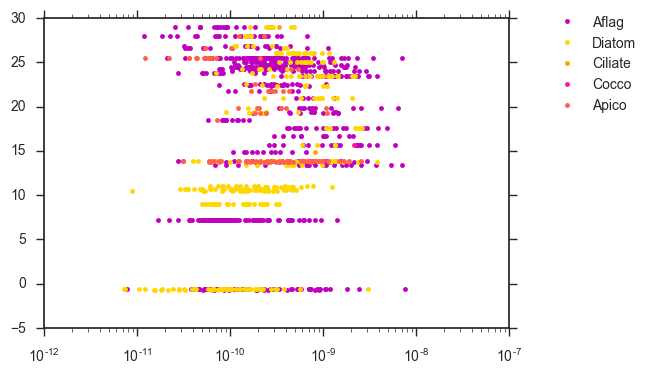

In [37]:
#show all the cells in different group or projs without groupby
c = ["m","gold","orange","deeppink","tomato"]
#marker = ['o', '.', '*', 'x', '+', 'v', '^', '<', '>', 's', 'd']
m = '.'

for ci, ti in zip(c, cell_type[:5]):
    sub = df[df['Cell type1']==ti]
    plt.plot(sub['kin/SA'], sub['Temp'], m, color=ci, label=ti)
    
plt.xscale('log')
plt.xlim([10e-13,10e-8])
#plt.ylim([0, 2])
plt.legend(numpoints=1, bbox_to_anchor=(1.3, 1.05))
plt.show()

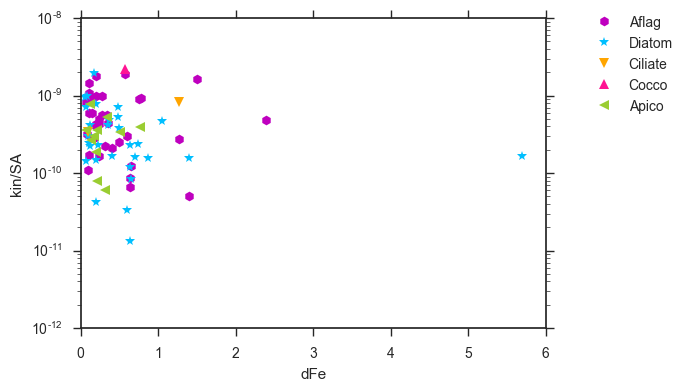

In [69]:
#show all the cells in different group or projs without groupby
c = ["m","deepskyblue","orange","deeppink","yellowgreen"]
marker = ['h', '*', 'v', '^', '<', '>', 's', 'd']
x = 'dFe'
y = 'kin/SA'

for ci, ti, m in zip(c, cell_type[:5], marker[:5]):
    sub = df[df['Cell type1']==ti].groupby(['Station'], as_index=False).mean()
    plt.plot(np.absolute(sub[x]), sub[y], m, color=ci, label=ti)
    
plt.yscale('log')
plt.ylim([1e-12,1e-8])
#plt.xlim([0, 2])
plt.legend(numpoints=1, bbox_to_anchor=(1.3, 1.05))
plt.xlabel(x)
plt.ylabel(y)
plt.show()

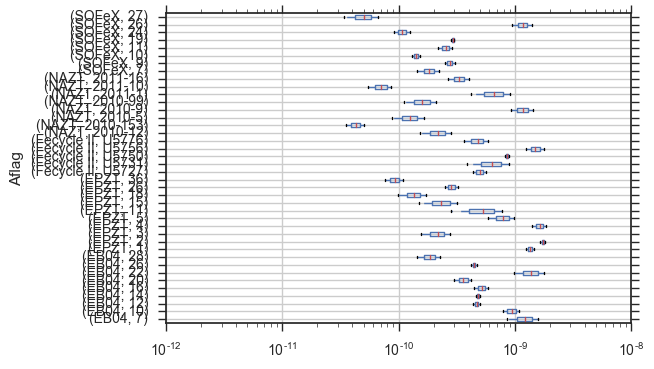

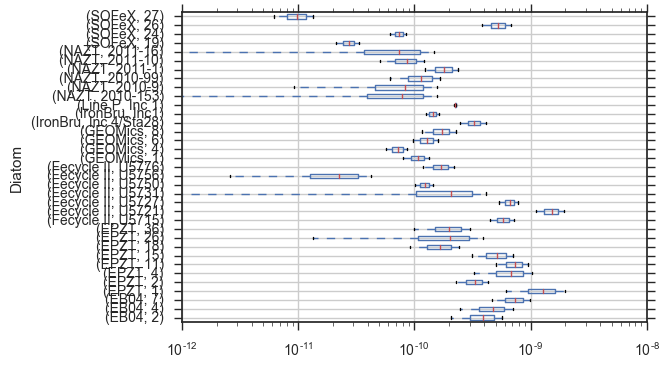

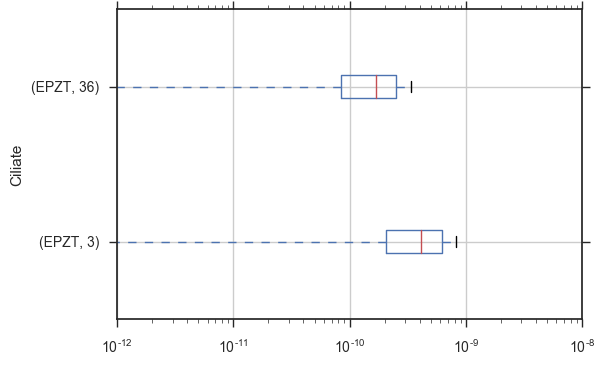

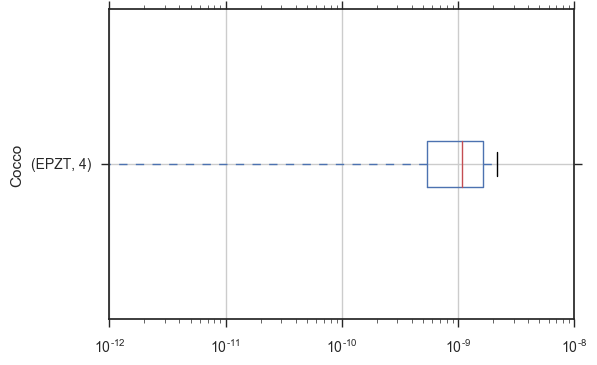

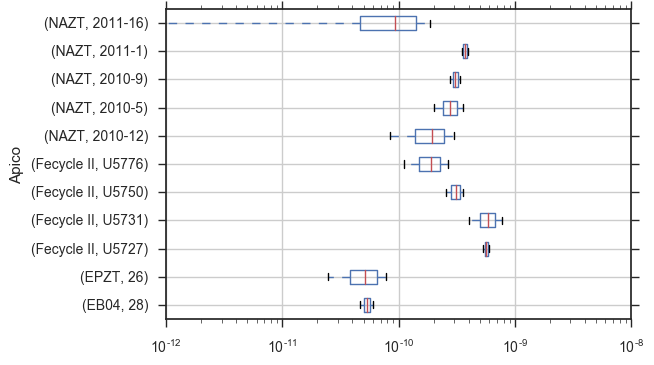

In [138]:
x = 'kin/SA'
m = 'd'

for ti in (cell_type[:5]):
    #plt.figure(figsize=(6, 8))
    sub = df[df['Cell type1']==ti].groupby(['Project','Station'], as_index=False)
    sub[x].agg(
        [np.nanmean,np.nanstd]).transpose().boxplot(vert=False,
                                                                             )
    #ind = np.arange(sub.shape[0])
    #ax = plt.plot(sub[x], ind,  m, color='tomato')
    plt.xscale('log')
    plt.xlim([1e-12,1e-8])
    plt.legend(numpoints=1, bbox_to_anchor=(1.3, 1.05))
    plt.ylabel(ti)
    #plt.yticks(ind+0.5, sub['Project'])
    plt.show()
    
    #plt.set_xticklabels(stn)

In [137]:
cell_type[0,1]

IndexError: too many indices for array